In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [187]:
np.random.seed(42)

M = 100

x = np.sort(np.random.uniform(-3,3, size=(M, 1)), axis=0)
n = np.random.normal(loc=0.0, scale=1, size=(M, 1))

y = 2 + x + 0.5*x**2
y_noisy = y + n

x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.3, random_state=10)
#x_train = x[0:70]
#y_train = y_noisy[0:70]
#x_test = x[70:]
#y_test = y_noisy[70:]

a)


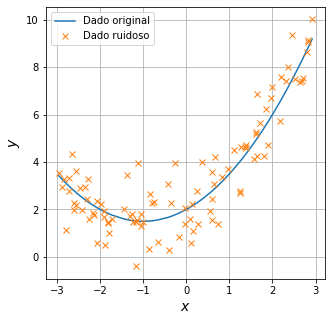

In [188]:
print('a)')
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()

In [189]:
# Polynomial order.
model_order = 90

In [190]:
lambdas = np.linspace(10**-10, 1, 1000)

e)


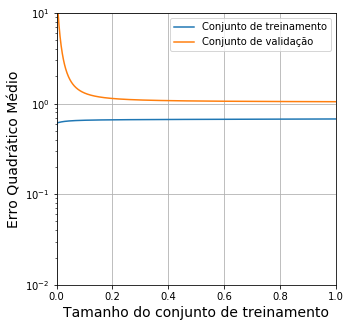

In [191]:
#b), c), d)
include_bias = True

error_training = []
error_test = []

minimum_val_error = float("inf")

fig = plt.figure(figsize=(5,5))

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Ridge(alpha=lambdas[i], solver="cholesky")
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_regul = model.predict(x_train)
    y_test_regul = model.predict(x_test)
    error_training.append((mean_squared_error(y_train, y_train_regul)))
    error_test.append((mean_squared_error(y_test, y_test_regul)))
    
    if mean_squared_error(y_test, y_test_regul) < minimum_val_error:
        best_lambda = lambdas[i]
        minimum_val_error = mean_squared_error(y_test, y_test_regul)
        best_model = clone(model, safe=True)
    
print('e)')
plt.plot(lambdas, error_training, label='Conjunto de treinamento')
plt.plot(lambdas, error_test, label='Conjunto de validação')
plt.yscale('log')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
#plt.ylim([1e-1, 12])
plt.axis([1e-12, 1, 1e-2, 10])
plt.legend()
plt.show()

In [192]:
print('f) Baseado no menor valor do erro de validação o valor ótimo para λ é ' + str(best_lambda))

f) Baseado no menor valor do erro de validação o valor ótimo para λ é 1.0


g)


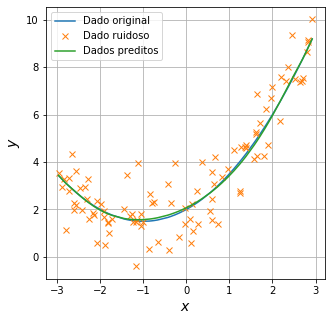

In [193]:
print('g)')
best_model.fit(x, y)
y_prediction = best_model.predict(x)

# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y_prediction, label='Dados preditos')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()

In [194]:
print('h) Pesos obtidos durante o treinamento do modelo: ')
print(best_model.named_steps['reg'].coef_)

h) Pesos obtidos durante o treinamento do modelo: 
[[ 0.00000000e+00  1.59421731e+00  1.10019647e+00  3.03555806e-01
   3.32379226e-01 -1.75402524e-02  4.77081058e-02 -7.05867607e-02
  -4.34475094e-02 -5.87116231e-02 -6.16114572e-02 -3.64649326e-02
  -5.42335594e-02 -1.75283300e-02 -3.97722074e-02 -4.18207894e-03
  -2.52007795e-02  4.28442869e-03 -1.28875716e-02  9.12447647e-03
  -3.35866121e-03  1.14616516e-02  3.56492373e-03  1.21552111e-02
   8.29302401e-03  1.18196918e-02  1.12709977e-02  1.08785127e-02
   1.29041976e-02  9.61567687e-03  1.35342254e-02  8.21695056e-03
   1.34370585e-02  6.80032885e-03  1.28297084e-02  5.43778731e-03
   1.18794657e-02  4.17050484e-03  1.07131682e-02  3.01938131e-03
   9.42547822e-03  1.99223302e-03  8.08587034e-03  1.08867120e-03
   6.74434127e-03  3.03377635e-04  5.43598135e-03 -3.71721614e-04
   4.18458277e-03 -9.46035441e-04  3.00545822e-03 -1.42939843e-03
   1.90762460e-03 -1.83150646e-03  8.95483001e-04 -2.16158278e-03
  -2.98969075e-05 -2.4281